In [2]:
ROWS_PER_FRAME = 543
def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

interpreter = tf.lite.Interpreter("D:/ASL/model.tflite")
found_signatures = list(interpreter.get_signature_list().keys())
prediction_fn = interpreter.get_signature_runner("serving_default")

pq_file = "D:/webapp/output.parquet"
xyz_np = load_relevant_data_subset(pq_file)

prediction = prediction_fn(inputs=xyz_np)

sign = prediction['outputs'].argmax()

train = pd.read_csv("D:/ASL/train.csv")
train['sign_ord'] = train['sign'].astype('category').cat.codes

# Dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()

ORD2SIGN[sign]

'duck'

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
list = []
with open('coco.names','r') as file:
    content = file.read()
    list = content.strip().lower().split("\n")
list

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [13]:
unique_signs = [i for i in np.unique(train['sign']) if i in list]
print(unique_signs)

['apple', 'bed', 'bird', 'boat', 'book', 'car', 'carrot', 'cat', 'chair', 'cow', 'dog', 'elephant', 'giraffe', 'horse', 'mouse', 'orange', 'person', 'pizza', 'refrigerator', 'scissors', 'toothbrush', 'zebra']


<Axes: >

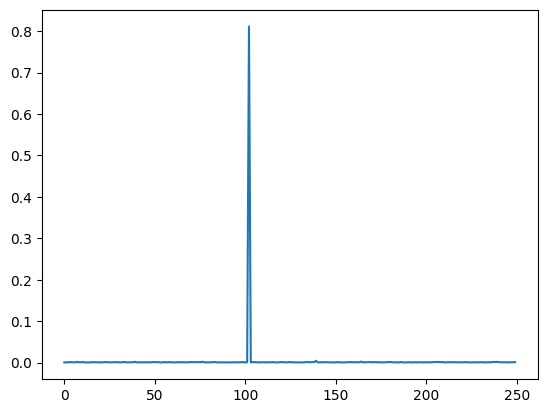

In [13]:
pd.Series(prediction['outputs']).plot()

In [19]:
len(xyz_np)

22

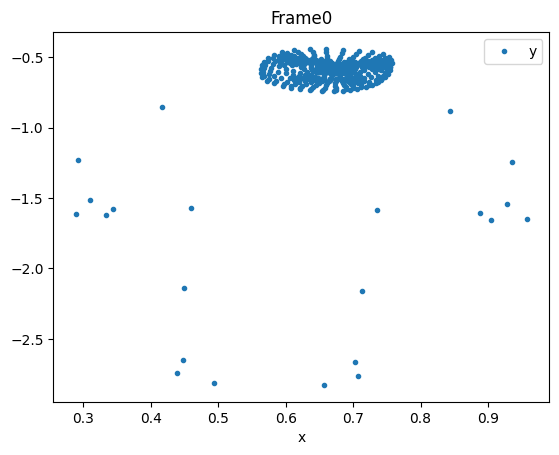

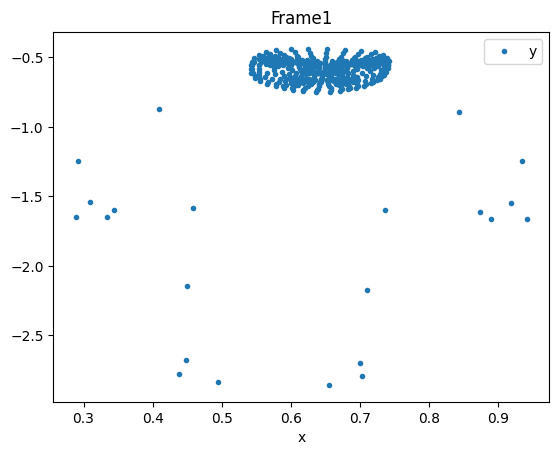

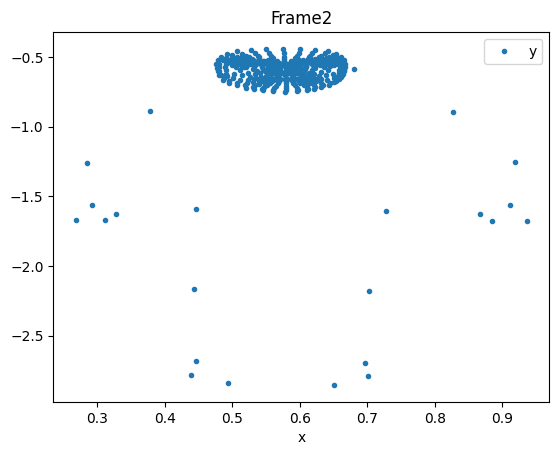

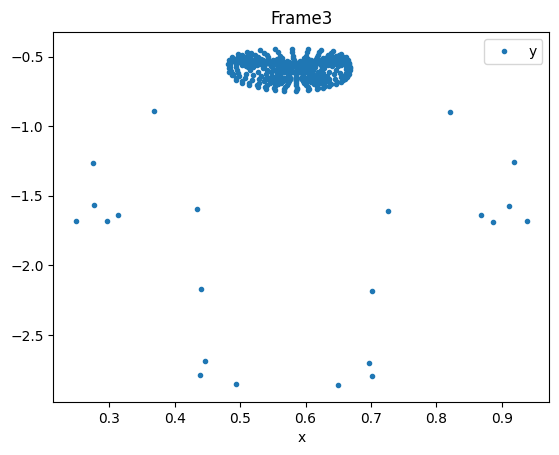

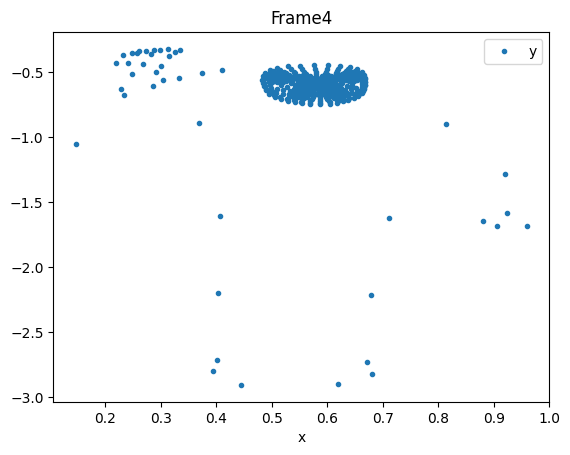

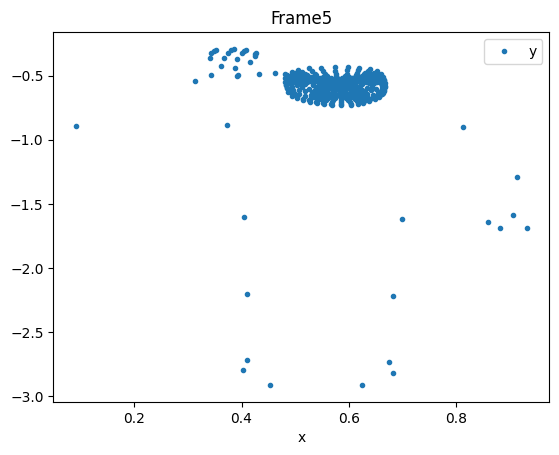

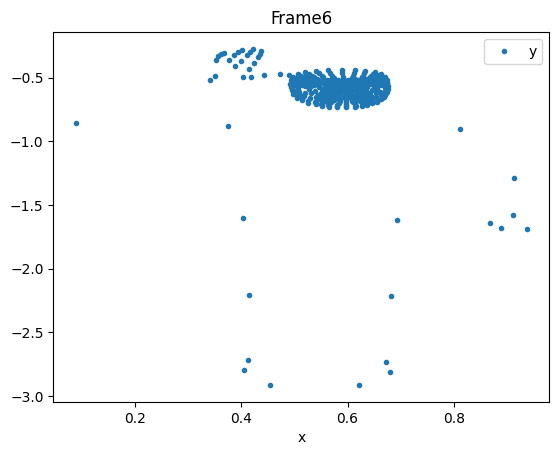

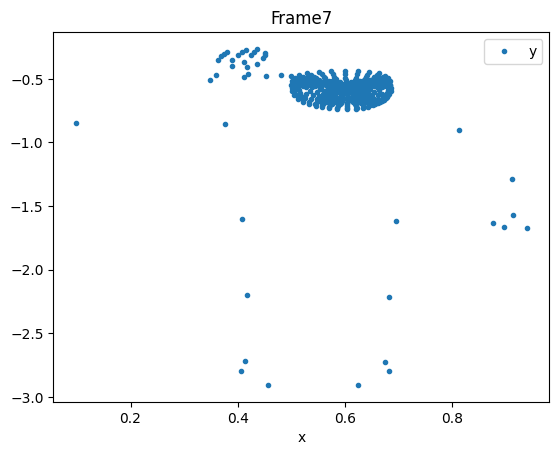

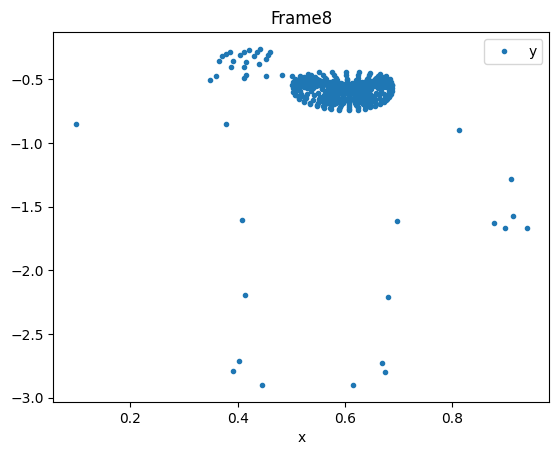

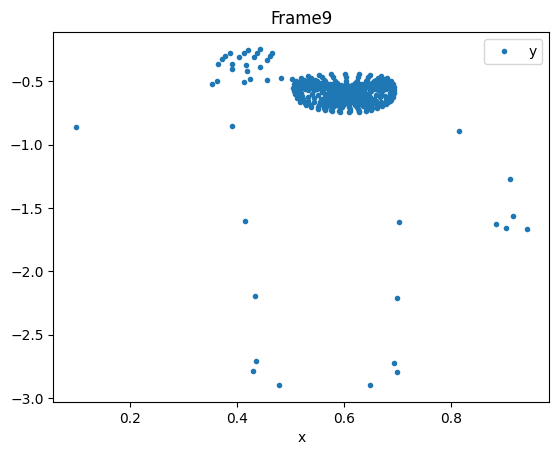

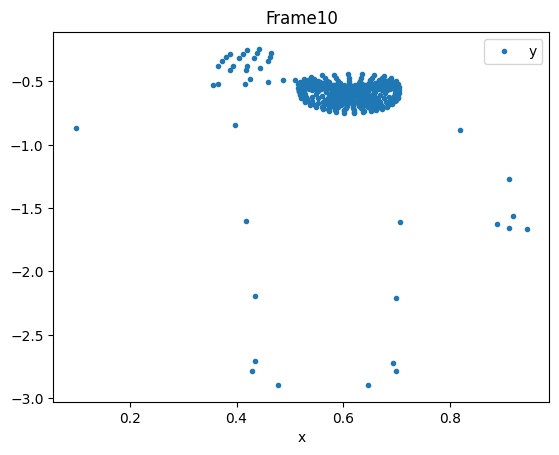

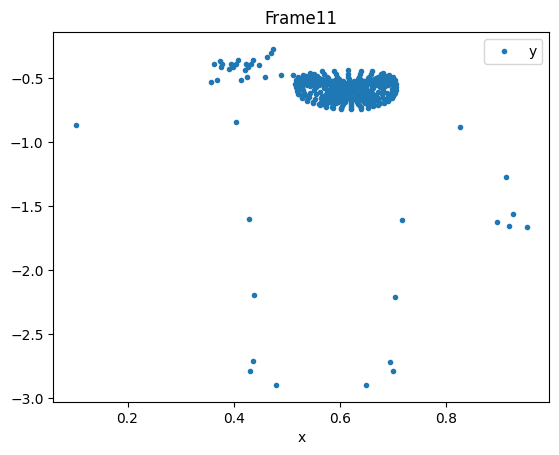

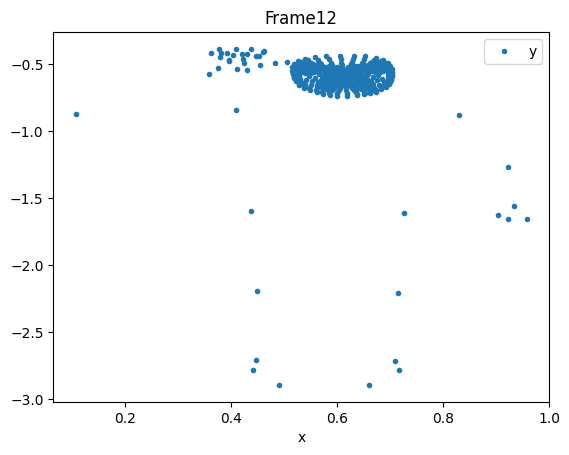

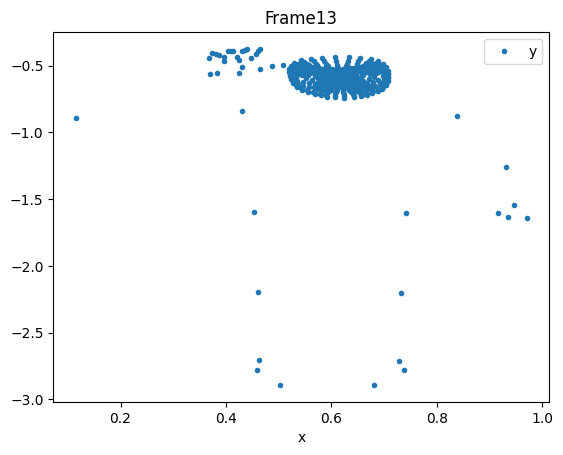

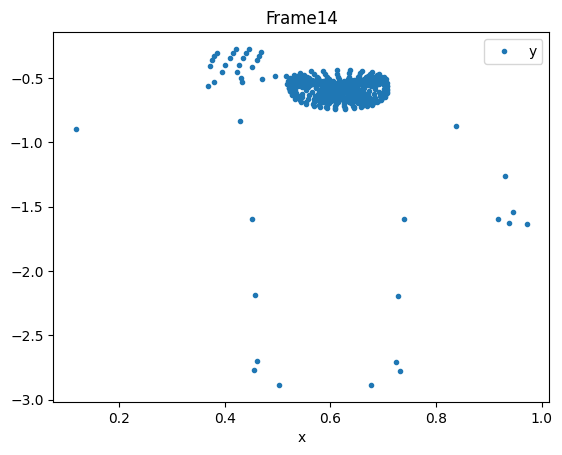

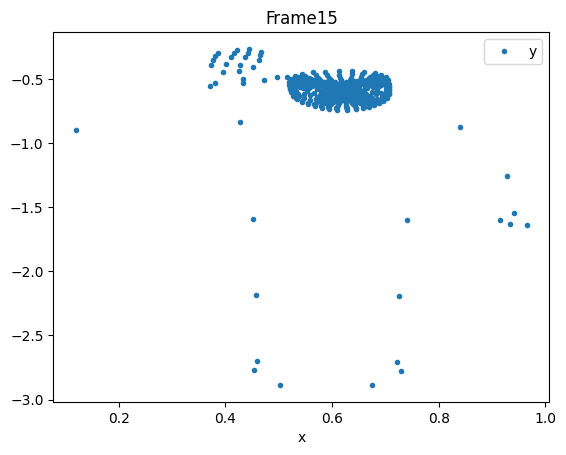

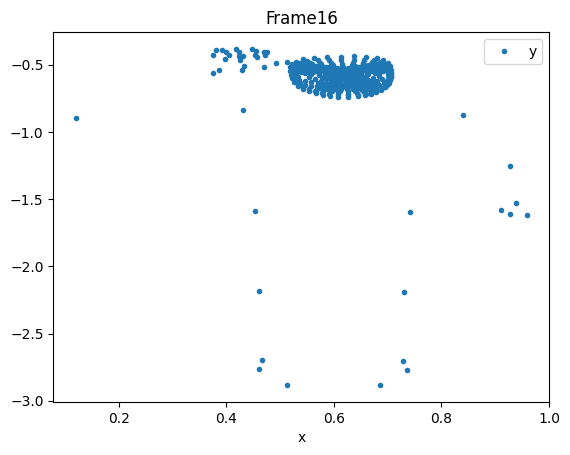

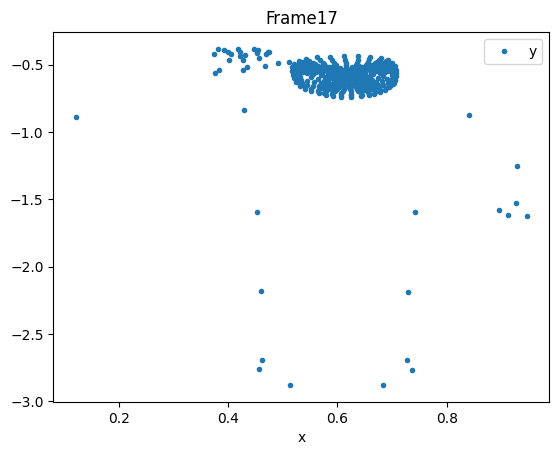

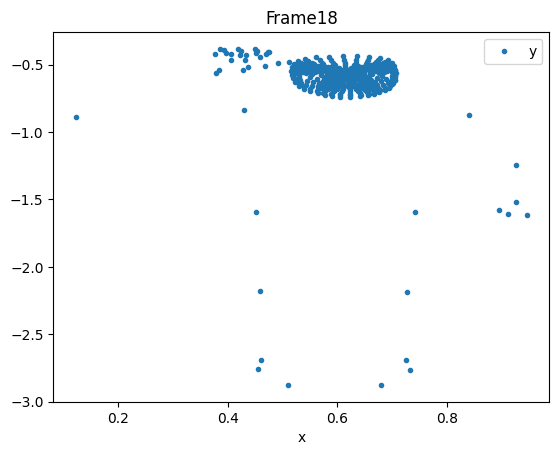

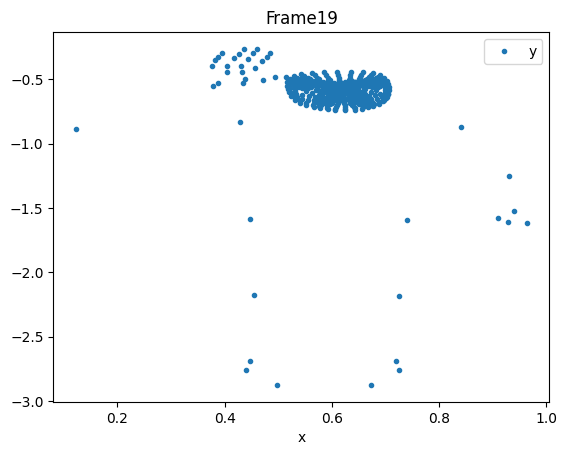

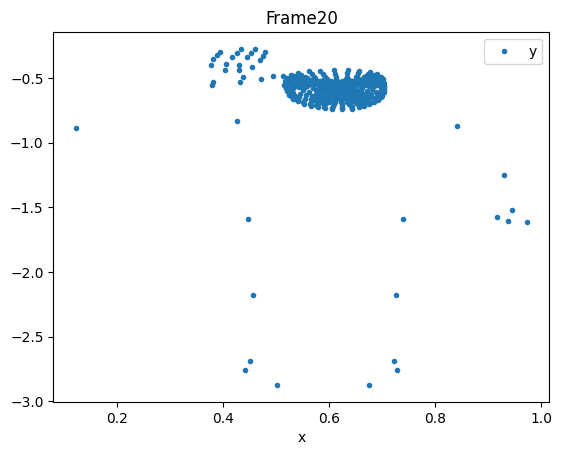

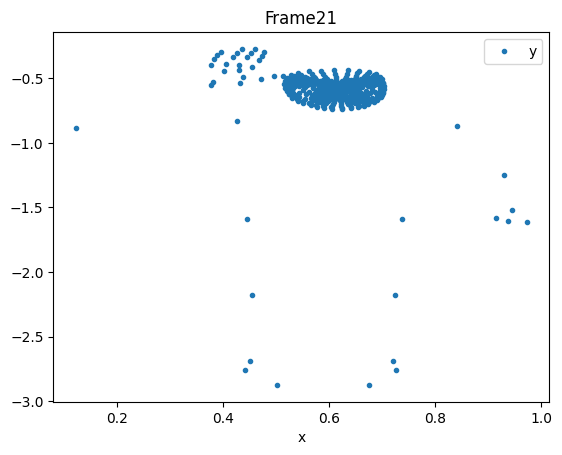

In [23]:
for frame, data in enumerate(xyz_np):
    df_temp = pd.DataFrame(data, columns=['x','y','z'])
    df_temp['y'] = -df_temp['y']
    df_temp.plot(x='x',y='y',style='.')
    plt.title(f'Frame{frame}')
    plt.show()
    